In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data 
d_2015 = pd.read_csv(filepath_or_buffer = 'data/2015.csv', index_col = 'Country')
d_2016 = pd.read_csv(filepath_or_buffer = 'data/2016.csv', index_col = 'Country')
d_2017 = pd.read_csv(filepath_or_buffer = 'data/2017.csv', index_col = 'Country')
d_2018 = pd.read_csv(filepath_or_buffer = 'data/2018.csv', index_col = 'Country or region')
d_2019 = pd.read_csv(filepath_or_buffer = 'data/2019.csv', index_col = 'Country or region')

In [3]:
#update column names 
d_2015.rename(columns = {'Happiness Rank': 'Rank', 'Happiness Score':'Score'}, inplace = True)
d_2016.rename(columns = {'Happiness Rank': 'Rank', 'Happiness Score':'Score'}, inplace = True)
d_2017.rename(columns = {'Happiness.Rank': 'Rank', 'Happiness.Score':'Score'}, inplace = True)
d_2018.index.name = 'Country'
d_2018.rename(columns = {'Overall rank': 'Rank'}, inplace = True)
d_2019.index.name = 'Country'
d_2019.rename(columns = {'Overall rank': 'Rank'}, inplace = True)

#select columns of interest 
df_2015 = d_2015[['Region', 'Rank', 'Score', 'Generosity']]
df_2016 = d_2016[['Region', 'Rank', 'Score', 'Generosity']] 
df_2017 = d_2017[['Rank', 'Score', 'Generosity']] 
df_2018 = d_2018[['Rank', 'Score', 'Generosity']] 
df_2019 = d_2019[['Rank', 'Score', 'Generosity']] 

In [4]:
#Data Profiling 

#check if null values exist in any dataset  - None exist 
df_2015[df_2015.isnull().any(axis =1) == True]
df_2016[df_2016.isnull().any(axis =1) == True]
df_2017[df_2017.isnull().any(axis =1) == True]
df_2018[df_2018.isnull().any(axis =1) == True]
df_2019[df_2019.isnull().any(axis =1) == True]


#check if list countries used for assessment is same over the years
print("Count of countries in list")
print("2015: ", df_2015.count()[0])
print("2016: ", df_2016.count()[0])
print("2017: ", df_2017.count()[0])
print("2018: ", df_2018.count()[0])
print("2019: ", df_2019.count()[0])



Count of countries in list
2015:  158
2016:  157
2017:  155
2018:  156
2019:  156


In [5]:
#Data Cleaning/Transformation 

#Create a country mapping table 
all_years = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis = 1, keys = [2015, 2016, 2017, 2018, 2019])
all_years[all_years.isnull().any(axis=1) == True]


#Update to currrent country name and region where needed 
all_countries = all_years
all_countries['new_name'] = all_countries.index
all_countries = all_countries['new_name']
all_countries = pd.concat([all_countries, df_2015['Region']], axis = 1)

all_countries.at['Taiwan Province of China', 'new_name'] = 'Taiwan'
all_countries.at['Taiwan Province of China', 'Region'] = 'Eastern Asia'

#China/Hong Kong reported separately - dont combine 
#all_countries.at['Hong Kong S.A.R., China', 'new_name'] = 'China'
all_countries.at['Hong Kong S.A.R., China', 'Region'] = 'Eastern Asia'

all_countries.at['North Macedonia', 'new_name'] = 'Macedonia'
all_countries.at['North Macedonia', 'Region'] = 'Central and Eastern Europe'

all_countries.at['Trinidad & Tobago', 'new_name'] = 'Trinidad and Tobago'
all_countries.at['Trinidad & Tobago', 'Region'] = 'Latin America and Caribbean'

all_countries.at['Northern Cyprus', 'new_name'] = 'North Cyprus'
all_countries.at['Northern Cyprus', 'Region'] = 'Western Europe'

all_countries.at['Somaliland region', 'new_name'] = 'Somaliland Region'
all_countries.at['Somaliland Region', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Somalia', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['South Sudan', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Gambia', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Namibia', 'Region'] = 'Sub-Saharan Africa'

all_countries.at['Belize', 'Region'] = 'Latin America and Caribbean'

all_countries.at['Puerto Rico', 'Region'] = 'Latin America and Caribbean'

all_countries[all_countries.isnull().any(axis =1) == True]

all_countries.rename(columns = {'Region': 'new_region'}, inplace = True)

all_countries

,new_name,new_region
Switzerland,Switzerland,Western Europe
Iceland,Iceland,Western Europe
Denmark,Denmark,Western Europe
Norway,Norway,Western Europe
Canada,Canada,North America
...,...,...
"Hong Kong S.A.R., China","Hong Kong S.A.R., China",Eastern Asia
Trinidad & Tobago,Trinidad and Tobago,Latin America and Caribbean
Northern Cyprus,North Cyprus,Western Europe
North Macedonia,Macedonia,Central and Eastern Europe


In [6]:
#update df with cleaned country name/region 
df_2015 = pd.concat([df_2015, all_countries], axis = 1).dropna()
df_2015 = df_2015.set_index('new_name')
df_2015 = df_2015[['Rank', 'Score', 'Generosity', 'new_region']]
df_2015

df_2016 = pd.concat([df_2016, all_countries], axis = 1).dropna()
df_2016 = df_2016.set_index('new_name')
df_2016 = df_2016[['Rank', 'Score', 'Generosity', 'new_region']]
df_2016


df_2017 = pd.concat([df_2017, all_countries], axis = 1).dropna()
df_2017 = df_2017.set_index('new_name')
df_2017 = df_2017[['Rank', 'Score', 'Generosity', 'new_region']]
df_2017

df_2018 = pd.concat([df_2018, all_countries], axis = 1).dropna()
df_2018 = df_2018.set_index('new_name')
df_2018 = df_2018[['Rank', 'Score', 'Generosity', 'new_region']]
df_2018

df_2019 = pd.concat([df_2019, all_countries], axis = 1).dropna()
df_2019 = df_2019.set_index('new_name')
df_2019 = df_2019[['Rank', 'Score', 'Generosity', 'new_region']]
df_2019


,Rank,Score,Generosity,new_region
new_name,,,,
Finland,1.0,7.769,0.153,Western Europe
Denmark,2.0,7.600,0.252,Western Europe
Norway,3.0,7.554,0.271,Western Europe
Iceland,4.0,7.494,0.354,Western Europe
Netherlands,5.0,7.488,0.322,Western Europe
...,...,...,...,...
Rwanda,152.0,3.334,0.217,Sub-Saharan Africa
Tanzania,153.0,3.231,0.276,Sub-Saharan Africa
Afghanistan,154.0,3.203,0.158,Southern Asia


In [8]:
#Combine all years 
all_countries = all_countries.set_index('new_name')
all_countries.rename(columns = {'new_region': 'Region'}, inplace = True)
all_countries = all_countries[~all_countries.index.duplicated(keep='last')]
all_countries

all_years = pd.concat( [all_countries, df_2015.loc[:, :'Generosity'], df_2016.loc[:, :'Generosity'], df_2017.loc[:, :'Generosity'], df_2018.loc[:, :'Generosity'], df_2019.loc[:, :'Generosity']], axis = 1, keys = ['Region', 2015, 2016, 2017, 2018, 2019])
all_years

df_2015['Year'] = '2015'
df_2016['Year'] = '2016'
df_2017['Year'] = '2017'
df_2018['Year'] = '2018'
df_2019['Year'] = '2019'

In [9]:
#Analysis over all years 
#Generosity over yeras 

all_byyear = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0).groupby('Year').mean()
all_byyear['Generosity%'] = (all_byyear['Generosity']/all_byyear['Score'])*100
all_byyear.drop(columns = ['Rank'])

,Score,Generosity,Generosity%
Year,,,
2015,5.375734,0.237296,4.414197
2016,5.382185,0.242635,4.508112
2017,5.354019,0.246883,4.611180
2018,5.375917,0.181006,3.366987
2019,5.407096,0.184846,3.418585


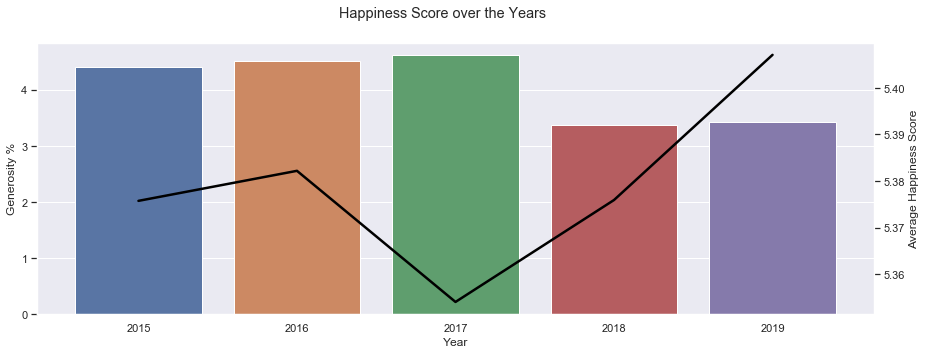

In [10]:
#Analysis over all years 
#Happiness Score over years 
sns.set() 

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Happiness Score over the Years')
all_byyear = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0).groupby('Year').mean()
all_byyear['Percentage'] = (all_byyear['Generosity']/all_byyear['Score'])*100

fig = sns.barplot(data = all_byyear, x= all_byyear.index.values ,y='Percentage')
ax2 = axs.twinx()
fig2 = sns.lineplot(x = axs.get_xticks(), y = 'Score', data = all_byyear, color='black', linewidth=2.5)

ax2.grid(False)
fig.set(xlabel='Year', ylabel='Generosity %')
fig2.set(ylabel = 'Average Happiness Score')

plt.show()

None

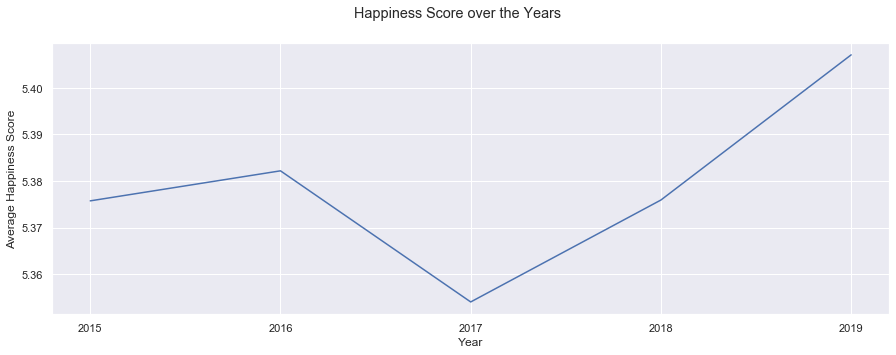

In [11]:
#Analysis over all years 
#Happiness Score over years 
sns.set() 

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Happiness Score over the Years')
all_byyear = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0).groupby('Year').mean()

fig = sns.lineplot(data = all_byyear, x= all_byyear.index.values ,y='Score')
fig.set(xlabel='Year', ylabel='Average Happiness Score')

None

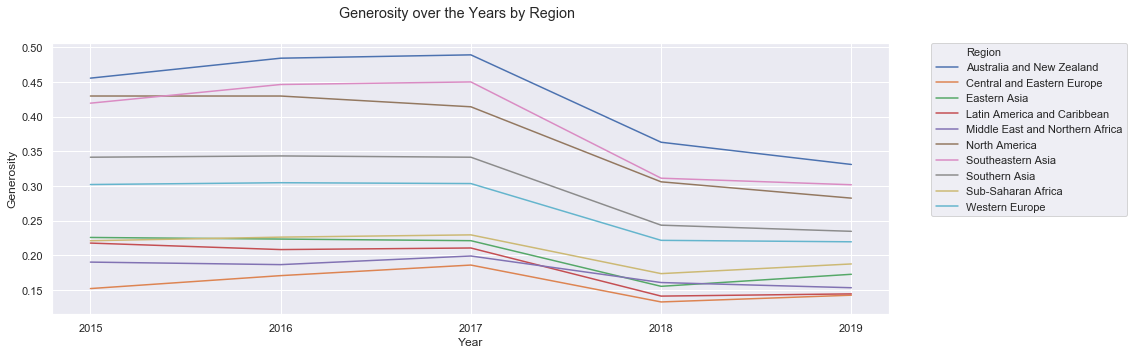

In [12]:
#Generosity by region by year 
fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Generosity over the Years by Region')
all_byyrreg = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0).groupby(['Year', 'new_region']).mean()
all_byyrreg=all_byyrreg.reset_index()
all_byyrreg.rename(columns = {'new_region':'Region'}, inplace = True )
all_byyrreg

fig = sns.lineplot(data = all_byyrreg, x= 'Year' ,y='Generosity', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None


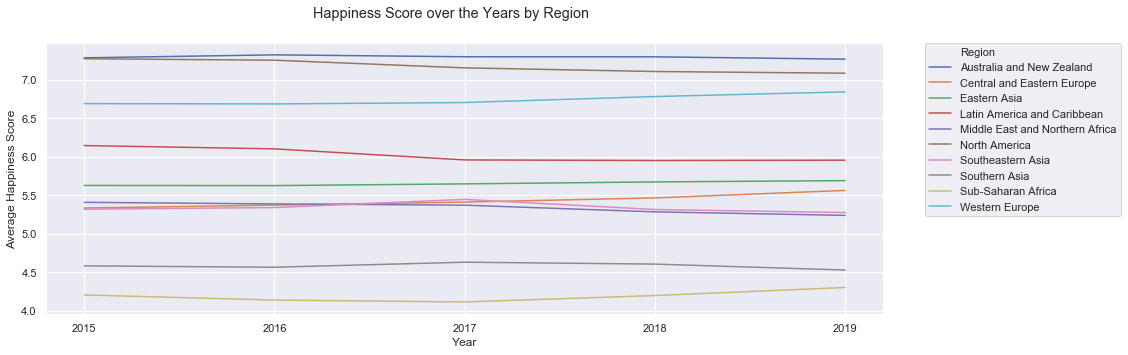

In [13]:
#Generosity by region by year 
fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Happiness Score over the Years by Region')
fig = sns.lineplot(data = all_byyrreg, x= 'Year' ,y='Score', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.set(xlabel='Year', ylabel='Average Happiness Score')
None

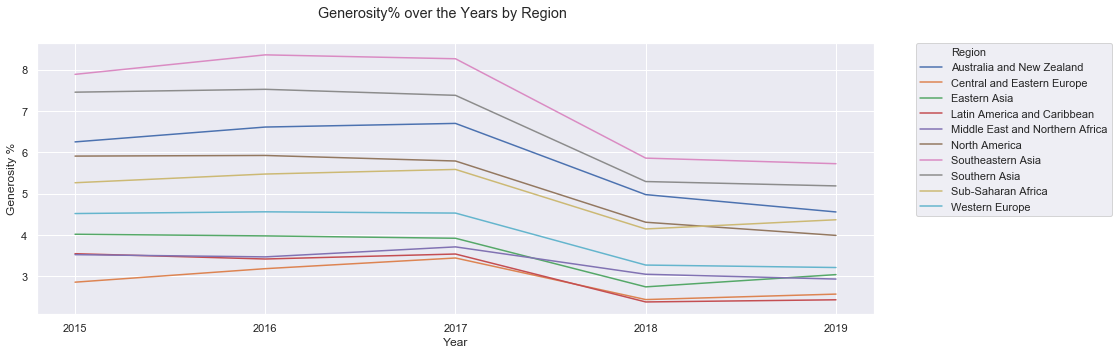

In [14]:
#Contribution of Generosity 
#Generosity by region by year 
all_byyrreg['Generosity%'] = (all_byyrreg['Generosity']/all_byyrreg['Score'])*100 
fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Generosity% over the Years by Region')
fig = sns.lineplot(data = all_byyrreg, x= 'Year' ,y='Generosity%', hue = 'Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.set(xlabel='Year', ylabel='Generosity %')
None

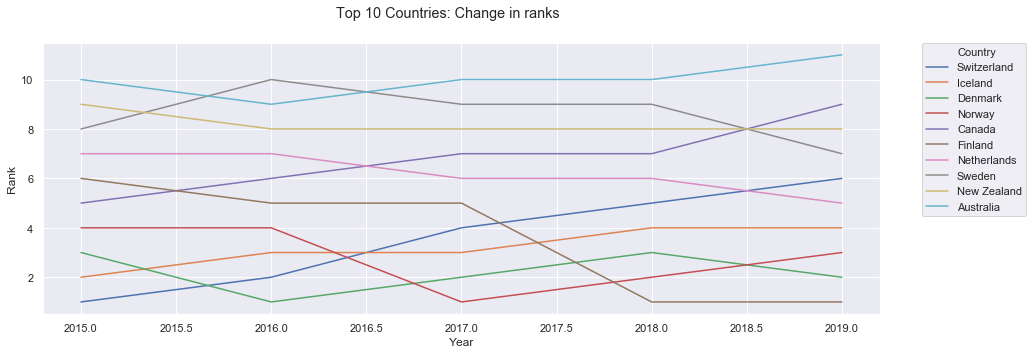

In [15]:
#top 10 countries in 2015 by rank 
top10countries = df_2015.sort_values(by = ['Rank']).head(10).index.values

top10 = all_years[[(2015, 'Rank'), (2016, 'Rank'), (2017, 'Rank'), (2018, 'Rank'), (2019, 'Rank')]]
#top10 = top10.loc[top10countries, :]
#top10 = top10.xs('Rank', axis=1, level = 1, drop_level=True).stack()
#top10.reset_index()
#reset_index
top10 = top10.loc[top10countries, :].xs('Rank', axis=1, level = 1, drop_level=True).stack().reset_index()
top10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Rank'}, inplace = True )
top10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Top 10 Countries: Change in ranks')
fig = sns.lineplot(data = top10, x= 'Year' ,y='Rank', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#fig.set(xlabel='Year', ylabel='Average Happiness Score')

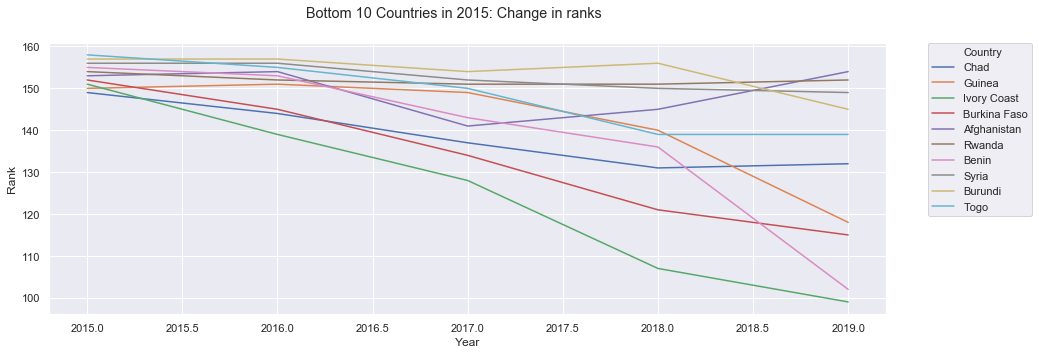

In [16]:
#bottom 10 countries in 2015 chnage in rank 
bottom10countries = df_2015.sort_values(by = ['Rank']).tail(10).index.values

bottom10 = all_years[[(2015, 'Rank'), (2016, 'Rank'), (2017, 'Rank'), (2018, 'Rank'), (2019, 'Rank')]]
bottom10 = bottom10.loc[bottom10countries, :].xs('Rank', axis=1, level = 1, drop_level=True).stack().reset_index()
bottom10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Rank'}, inplace = True )
bottom10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Bottom 10 Countries in 2015: Change in ranks')
fig = sns.lineplot(data = bottom10, x= 'Year' ,y='Rank', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None


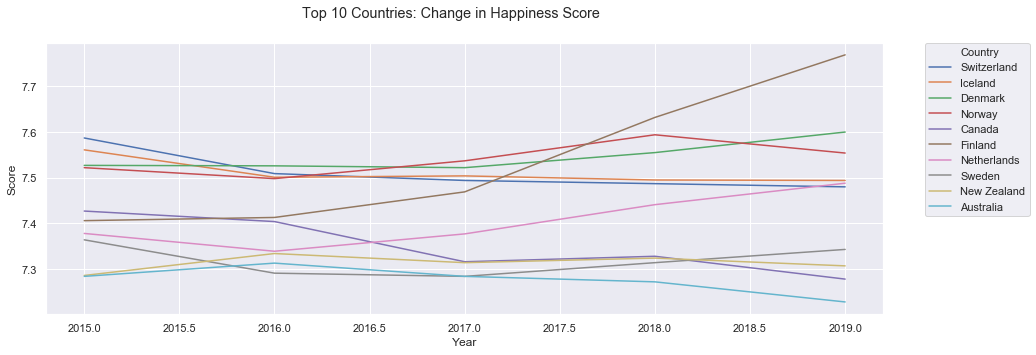

In [17]:
#top 10 countries in 2015 by Happiness Score  
top10countries = df_2015.sort_values(by = ['Rank']).head(10).index.values

top10 = all_years[[(2015, 'Score'), (2016, 'Score'), (2017, 'Score'), (2018, 'Score'), (2019, 'Score')]]
#top10 = top10.loc[top10countries, :]
#top10 = top10.xs('Rank', axis=1, level = 1, drop_level=True).stack()
#top10.reset_index()
#reset_index
top10 = top10.loc[top10countries, :].xs('Score', axis=1, level = 1, drop_level=True).stack().reset_index()
top10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Score'}, inplace = True )
top10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Top 10 Countries: Change in Happiness Score')
fig = sns.lineplot(data = top10, x= 'Year' ,y='Score', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None
#fig.set(xlabel='Year', ylabel='Average Happiness Score')

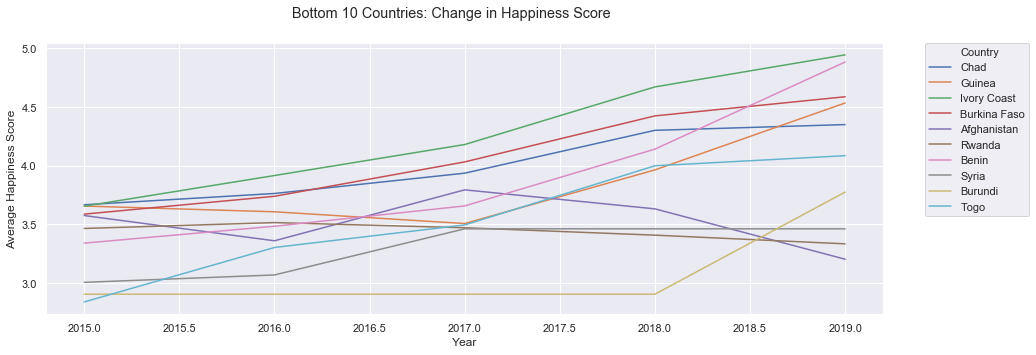

In [18]:
#bottom 10 countries in 2015 by Happiness Score  
bottom10countries = df_2015.sort_values(by = ['Rank']).tail(10).index.values

bottom10 = all_years[[(2015, 'Score'), (2016, 'Score'), (2017, 'Score'), (2018, 'Score'), (2019, 'Score')]]
#top10 = top10.loc[top10countries, :]
#top10 = top10.xs('Rank', axis=1, level = 1, drop_level=True).stack()
#top10.reset_index()
#reset_index
bottom10 = bottom10.loc[bottom10countries, :].xs('Score', axis=1, level = 1, drop_level=True).stack().reset_index()
bottom10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Score'}, inplace = True )
bottom10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Bottom 10 Countries: Change in Happiness Score')
fig = sns.lineplot(data = bottom10, x= 'Year' ,y='Score', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.set(xlabel='Year', ylabel='Average Happiness Score')
None

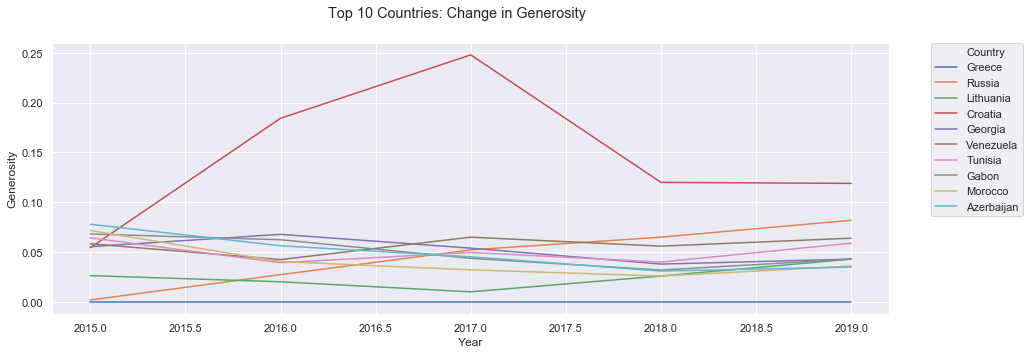

In [19]:
#top 10 countries in 2015 by Generosity 
top10countries = df_2015.sort_values(by = ['Generosity']).head(10).index.values

top10 = all_years[[(2015, 'Generosity'), (2016, 'Generosity'), (2017, 'Generosity'), (2018, 'Generosity'), (2019, 'Generosity')]]
#top10 = top10.loc[top10countries, :]
#top10 = top10.xs('Rank', axis=1, level = 1, drop_level=True).stack()
#top10.reset_index()
#reset_index
top10 = top10.loc[top10countries, :].xs('Generosity', axis=1, level = 1, drop_level=True).stack().reset_index()
top10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Generosity'}, inplace = True )
top10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Top 10 Countries: Change in Generosity')
fig = sns.lineplot(data = top10, x= 'Year' ,y='Generosity', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None


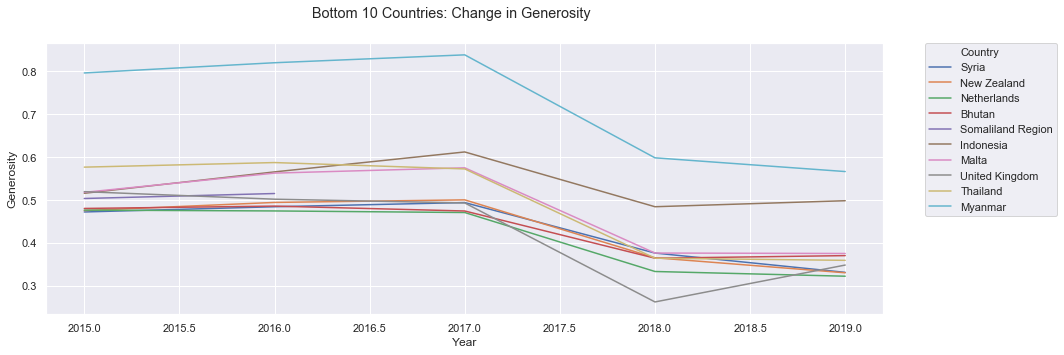

In [20]:
#bottom 10 countries in 2015 by Generosity 
bottom10countries = df_2015.sort_values(by = ['Generosity']).tail(10).index.values

bottom10 = all_years[[(2015, 'Generosity'), (2016, 'Generosity'), (2017, 'Generosity'), (2018, 'Generosity'), (2019, 'Generosity')]]
bottom10 = bottom10.loc[bottom10countries, :].xs('Generosity', axis=1, level = 1, drop_level=True).stack().reset_index()
bottom10.rename(columns = {'level_0':'Country', 'level_1':'Year', 0:'Generosity'}, inplace = True )
bottom10

fig, axs = plt.subplots(figsize=(15,5))
fig.suptitle('Bottom 10 Countries: Change in Generosity')
fig = sns.lineplot(data = bottom10, x= 'Year' ,y='Generosity', hue = 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None


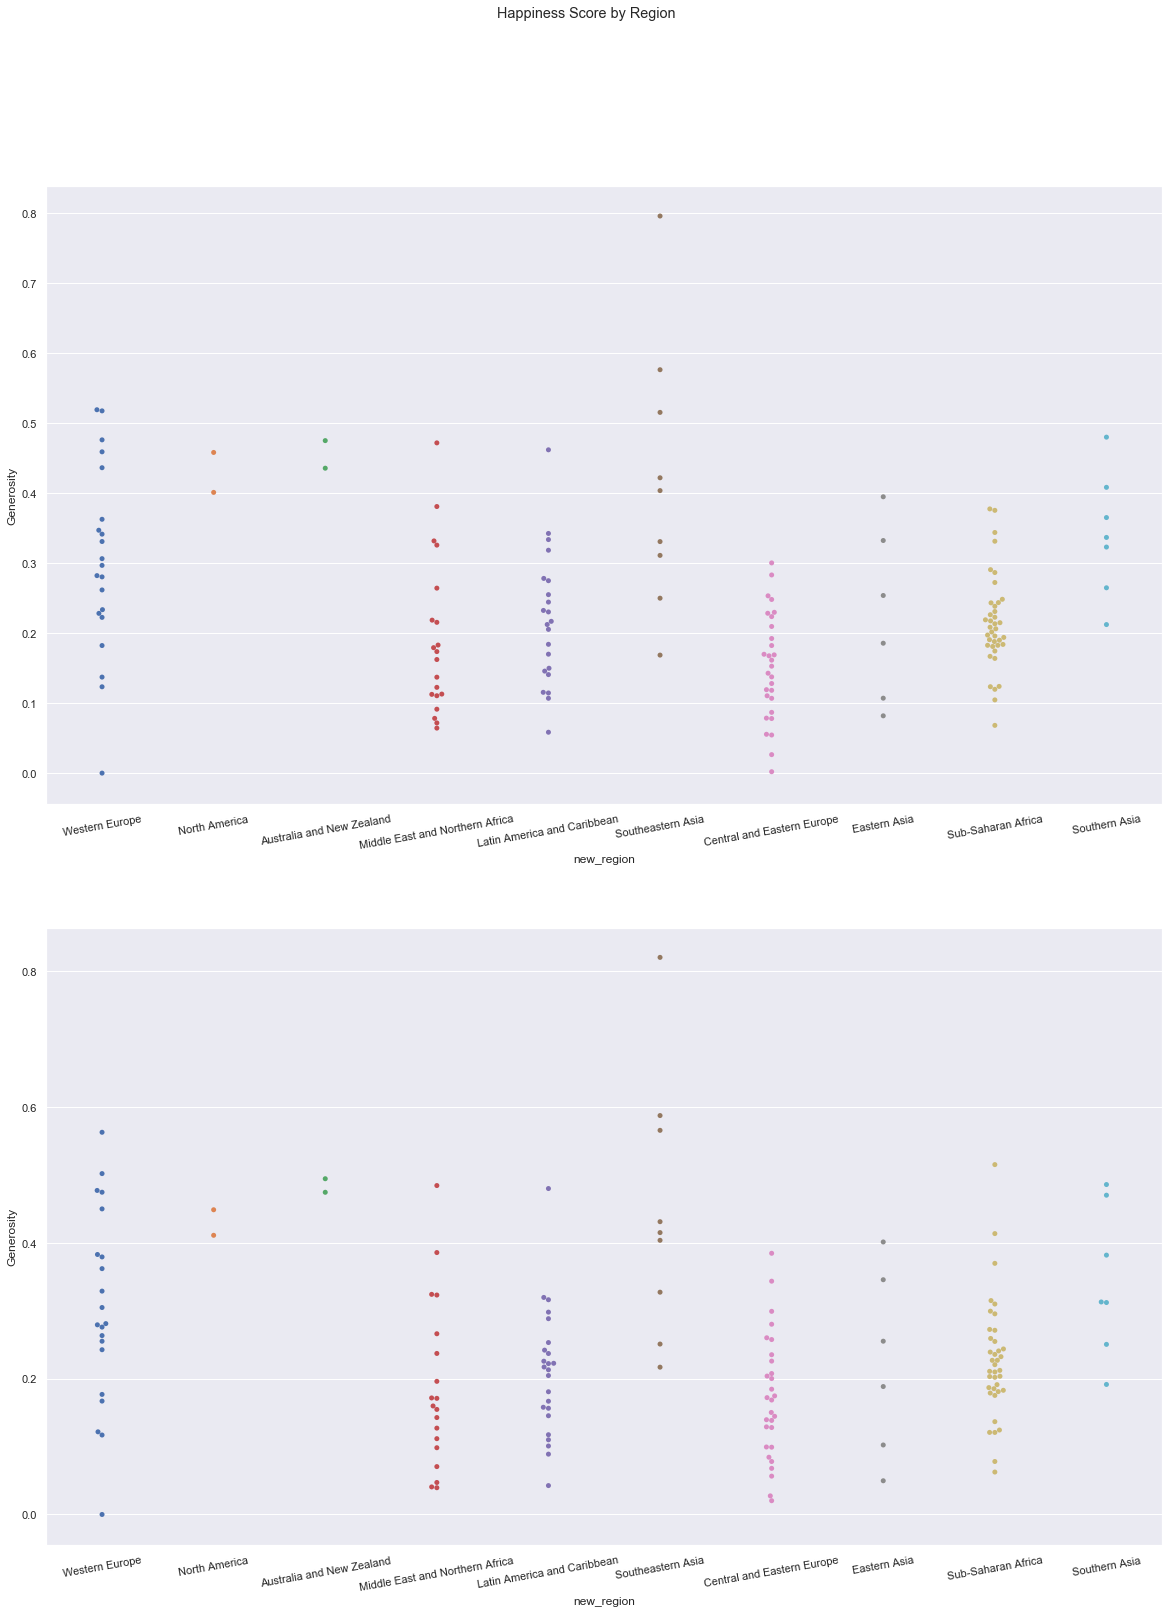

In [24]:
#Analysis by region 
sns.set() 


fig, axs = plt.subplots(2, 1, figsize=(20,25))

#plt.figure()


fig.suptitle('Happiness Score by Region')


fig1 = sns.swarmplot(x=df_2015['new_region'], y=d_2015['Generosity'], data=df_2015, ax = axs[0])
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=10)
None
fig2 = sns.swarmplot(x=df_2016['new_region'], y=d_2016['Generosity'], data=df_2016, ax = axs[1])
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=10)
None



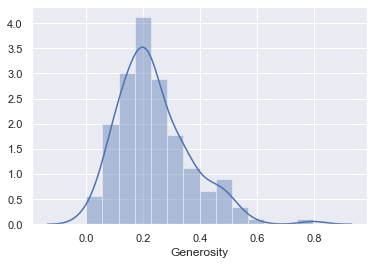

In [23]:
fig1 = sns.distplot(d_2015['Generosity'])